In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
number_parental = pd.read_csv("~/qbb2021-answers/day4-lunch/aau1043_dnm.tsv", sep = ",")
age = pd.read_csv("~/qbb2021-answers/day4-lunch/aau1043_parental_age.tsv", sep=",")

In [4]:
number_parental

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [5]:
number_parental
proband_id = number_parental.loc[:,"Proband_id"]
proband_id.value_counts()
total_number = proband_id.value_counts()
total_number

91410     122
114094    121
111288    115
8147      114
88246     113
         ... 
121087     37
62630      34
76504      34
37789      34
13990      33
Name: Proband_id, Length: 396, dtype: int64

In [6]:
roi = number_parental.loc[:,"Phase_combined"] == "father"
number_parental[roi].loc[:,"Proband_id"].value_counts()
pat_dnm = number_parental[roi].loc[:,"Proband_id"].value_counts()
pat_dnm

91410     111
114094     98
111288     93
99984      91
64166      88
         ... 
76504      27
1097       26
13990      25
36430      25
37789      17
Name: Proband_id, Length: 396, dtype: int64

In [7]:
roi = number_parental.loc[:,"Phase_combined"] == "mother"
number_parental[roi].loc[:,"Proband_id"].value_counts()
mat_dnm = number_parental[roi].loc[:,"Proband_id"].value_counts()
mat_dnm

112917    32
13191     31
101332    30
142988    29
14991     28
          ..
93086      4
130614     3
37789      3
113829     3
121087     1
Name: Proband_id, Length: 396, dtype: int64

In [8]:
frame = {"pat_dnm" : pat_dnm, "mat_dnm" : mat_dnm, "total_dnm" : total_number}

In [9]:
pd.DataFrame.from_dict(frame)

,pat_dnm,mat_dnm,total_dnm
675,51,19,70
1097,26,12,39
1230,42,12,57
1481,53,14,68
1806,61,11,78
...,...,...,...
153657,41,8,49
154565,61,14,75
154621,39,11,50
154810,55,14,69


In [10]:
age_2 = age.set_index("Proband_id")
frame_2 = {"pat_dnm" : pat_dnm, "mat_dnm" : mat_dnm, "total_dnm" : total_number, "father_age": age_2.loc[:,"Father_age"], "mother_age": age_2.loc[:,"Mother_age"]}

In [11]:
enlarged_df = pd.DataFrame.from_dict(frame_2)
enlarged_df
enlarged_df.index.name = "Proband ID"

In [12]:
enlarged_df.head(20)

,pat_dnm,mat_dnm,total_dnm,father_age,mother_age
Proband ID,,,,,
675,51,19,70,31,36
1097,26,12,39,19,19
1230,42,12,57,30,28
1481,53,14,68,32,20
1806,61,11,78,38,34
2280,63,9,75,38,20
3190,40,11,52,35,25
3212,43,7,52,23,19
3450,42,11,56,25,22


In [13]:
maternal_count = enlarged_df.loc[:,"mat_dnm"]
maternal_age = enlarged_df.loc[:,"mother_age"]
paternal_count = enlarged_df.loc[:,"pat_dnm"]
paternal_age = enlarged_df.loc[:, "father_age"]

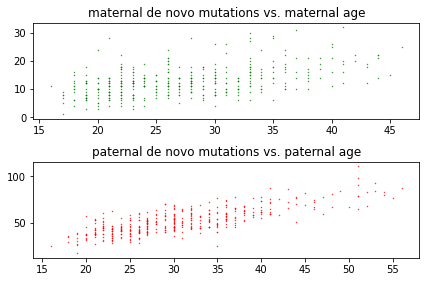

In [14]:
fig, ax = plt.subplots(nrows = 2)
ax[0].plot(maternal_age, maternal_count, ".", markersize = 0.8, color = "green")
ax[0].set_title("maternal de novo mutations vs. maternal age")
ax[1].plot(paternal_age, paternal_count, ".", markersize = 0.8, color = "red")
ax[1].set_title("paternal de novo mutations vs. paternal age")
fig. tight_layout(pad=1.0)
plt.show()

In [30]:
#enlarged_df.index.name = "Proband ID"
enlarged_df.head(20)

,pat_dnm,mat_dnm,total_dnm,father_age,mother_age
Proband ID,,,,,
675,51,19,70,31,36
1097,26,12,39,19,19
1230,42,12,57,30,28
1481,53,14,68,32,20
1806,61,11,78,38,34
2280,63,9,75,38,20
3190,40,11,52,35,25
3212,43,7,52,23,19
3450,42,11,56,25,22


In [15]:
model = smf.ols(formula = "mat_dnm ~ mother_age", data = enlarged_df)
results_1 = model.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           6.88e-24
Time:                        08:51:01   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results_1.pvalues

Intercept     1.104177e-02
mother_age    6.878208e-24
dtype: float64

# 

In [17]:
model_2 = smf.ols(formula = "pat_dnm ~ father_age", data = enlarged_df)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-84
Time:                        08:51:01   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results_2.pvalues

Intercept     3.079437e-09
father_age    1.552294e-84
dtype: float64

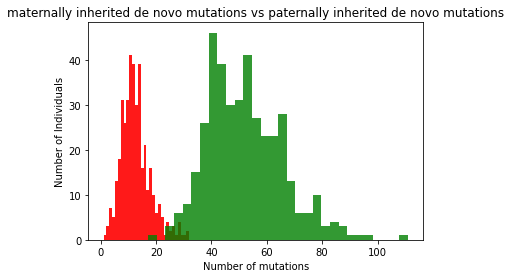

In [36]:
fig, ax = plt.subplots()
ax.hist(maternal_count, bins = 30, alpha = 0.9, color = "red")
ax.hist(paternal_count, bins = 30, alpha = 0.8, color = "green")
ax.set_xlabel("Number of mutations")
ax.set_ylabel("Number of Individuals")
ax.set_title("maternally inherited de novo mutations vs paternally inherited de novo mutations")
plt.show()

In [20]:
stats.ttest_ind(maternal_count, paternal_count)

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

In [21]:
model_3 = smf.poisson(formula = "mat_dnm ~ mother_age", data = enlarged_df)
results_3 = model_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                 0.07164
Time:                        08:51:02   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [22]:
model_4 = smf.poisson(formula = "pat_dnm ~ father_age", data = enlarged_df)
results_4 = model_4.fit()
results_4.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 Sep 2021   Pseudo R-squ.:                  0.2277
Time:                        08:51:02   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [23]:
#prediction:
3.1903 + 0.0241*50.5

4.40735

In [42]:
import numpy as np
np.exp(4.40735)

82.05173803957092

In [37]:
results_4.params

Intercept     3.190257
father_age    0.024096
dtype: float64

In [38]:
new_observation = pd.DataFrame({"father_age" : [50.5]})
results_4.predict(new_observation)

0    82.031316
dtype: float64